<a href="https://colab.research.google.com/github/srividya22/100-shell-script-examples/blob/master/Catch_phrase_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

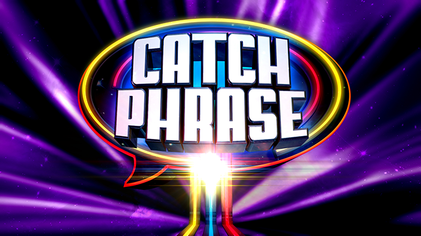
# **Catch Phrase Game ( Customized )**

Catchphrase Game cutomized for Genomics, Machine learning, Computer Science  enthusiasts




## **Topics Covered**

*   ### **Genomics**
*   ### **Machine Learning**
*   ### **Data Structures and Algorithms**




## **How do you Play ?**

According to Catchphrase rules, you must have seperate yourself into two teams. The teams do not need to be the same size. Pick a player to go first and determine the order of players for the rounds.

Before you start the game, every player must have a copy of this notebook saved to their drive and play it using their saved copy of the ipynb notebook. Please go ahead and run all the code cells in the notebook. The last code cell will have "New word" button. As you press the "New code" button, a new word pops up in the output cell. 

If you dont like the word you got, pressing "New word" button will give you a new word for the game. To start the game, the first player must press the “Timer” button. 

Once a word is displayed, the goal is to give clues that will allow your team to guess the word. Per Catchphrase rules, this can be verbal clues or physical gestures. As soon as the the word has been guessed, the next players clicks the "New button" to go on. 

There are three things you may not give as a clue: 

*   A word that rhymes with the word.
*   The first letter of the word.
*   Part of the word (ie shoe for shoe horn)
 
If you are caught breaking any of these three rules, press the “Timer” button to shut off the timer. The other team automatically gets a point for that round.


In [8]:
# Code to web scrape glossary for genomics and Machine learning web pages
from bs4 import BeautifulSoup as soup
import requests
import random

def getPageContents(plink,hclass):
    player_page = requests.get(plink)
    cont = soup(player_page.content, 'html.parser')
    terms=[]
    for i in cont.find_all( class_= hclass):
        word = i.string
        if word is not None:
           if word.lower() not in terms:
              terms.append(word.lower())
    return terms

def getMPageContents(plink,tag):
    player_page = requests.get(plink)
    cont = soup(player_page.content, 'html.parser')
    terms=[]
    for i in cont.find_all(class_=tag):
       word = str(i.prettify).split("name=")[1].split("></a>>")[0]
       if word is not None:
          if word.lower() not in terms:
              terms.append(word.lower())
    return terms

def getDsPageContents(plink,tag):
    player_page = requests.get(plink)
    cont = soup(player_page.content,'html.parser')
    #print(cont.prettify)
    terms = list(set([str(item.string).lower() if item.get('href') is not None else item['src'] for item in cont.select('[href^="HTML/"], [src^="HTML/"]') ])) 
    return terms

genomics_page = "http://pevsnerlab.kennedykrieger.org/wiley/appendix.htm#A"
ml_page = "https://developers.google.com/machine-learning/glossary"
ds_page = "https://xlinux.nist.gov/dads/"
gdict_terms = getPageContents(genomics_page, "entry")
mldict_terms = getMPageContents(ml_page,"glossary-anchor")
dsdict_terms = getDsPageContents(ds_page,"test")

In [9]:
import IPython
import uuid
from google.colab import output
from IPython.display import clear_output
import time

class InvokeButton(object):
  def __init__(self, title, callback):
    self._title = title
    self._callback = callback

  def _repr_html_(self):
    callback_id = 'button-' + str(uuid.uuid4())
    output.register_callback(callback_id, self._callback)

    template = """<button id="{callback_id}">{title}</button>
        <script>
          document.querySelector("#{callback_id}").onclick = (e) => {{
            google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
            e.preventDefault();
          }};
        </script>"""
    html = template.format(title=self._title, callback_id=callback_id)
    return html



In [10]:
#@title # **CatchPhrase Game** { run: "auto" }
#@markdown Customized CatchPhrase game for Genomics / Machine Learning enthusiasts

Topic = "Machine Learning" #@param ['Genomics', 'Machine Learning' , 'Data Structures and Algorithms'] {allow-input: false}
Category = "Hard" #@param ['Easy', 'Medium' ,'Hard'] {allow-input: false}
Timer = 30  #@param {type: "slider", min: 0, max: 60}
#@markdown ---

def generate_random_word():
  #clear_output()
  output.clear(output_tags='new_word')
  with output.use_tags('new_word'):
       if Topic == "Machine Learning":
          print(random.choice(mldict_terms).upper())
       if Topic == "Genomics":
          print(random.choice(gdict_terms).upper())
       if Topic == "Data Structures and Algorithms":
          print(random.choice(dsdict_terms).upper())
InvokeButton('New word',generate_random_word)
 



"INFERENCE"


In [6]:
def start_timer(secs=30):
    output.clear(output_tags='timer_out')

    with output.use_tags('timer_out'):
         print('Starting Timer for 30s.')
         time.sleep(secs/3)
         print('10s ..')
         time.sleep(secs/3)
         print('20s ..')
         time.sleep(secs/3)
         print('30s .. Time Up !!!\n')

InvokeButton('Timer',start_timer)


Starting Timer for 30s.
10s ..
20s ..
30s .. Time Up !!!



## **Future Enhancements :**

1.   Tie in the Category easy, Medium, Hard
2.   Better timer to add to the game

